<a href="https://colab.research.google.com/github/Jkhou1000/Project_repository/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd

In [75]:
filename = "/content/drive/MyDrive/Coding Dojo/Stack 1/W2: Pandas/sales_predictions (1).csv"
df_food = pd.read_csv(filename)
df_food.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
filename = "/content/drive/MyDrive/Coding Dojo/Stack 1/W2: Pandas/sales_predictions (1).csv"
df_food = pd.read_csv(filename)
df_food.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
#Rows and Columns
df_food.shape

(8523, 12)

In [78]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [79]:
#I am going to rename all these to simplifiy them slightly
df_food = df_food.rename(columns={'Item_Identifier':'i_ident',
                             'Item_Weight': 'i_weight',
                             'Item_Fat_Content': 'fat_content',
                             'Item_Visibility': 'i_visibility',
                             'Item_Type': 'i_type',
                             "Item_MRP": 'max_retprice',
                             'Outlet_Identifier': 'o_identify',
                             'Outlet_Establishment_Year': 'estab_year',
                             'Outlet_Size': "o_size",
                             'Outlet_Location_Type': 'o_loctype',
                             'Outlet_Type': 'o_type',
                             'Item_Outlet_Sales': 'io_sales'})

df_food.head()

,i_ident,i_weight,fat_content,i_visibility,i_type,max_retprice,o_identify,estab_year,o_size,o_loctype,o_type,io_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
df_food.duplicated()
#Uh oh, too many rows!

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [81]:
df_food.duplicated().sum()
#No duplicates? 

0

In [82]:
df_food.isna()
#Again, time to sum it up

,i_ident,i_weight,fat_content,i_visibility,i_type,max_retprice,o_identify,estab_year,o_size,o_loctype,o_type,io_sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
df_food.isna().sum()

i_ident            0
i_weight        1463
fat_content        0
i_visibility       0
i_type             0
max_retprice       0
o_identify         0
estab_year         0
o_size          2410
o_loctype          0
o_type             0
io_sales           0
dtype: int64

In [84]:
df_food['i_weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: i_weight, Length: 415, dtype: int64

In [85]:
df_food['i_weight'].fillna(0, inplace=True)
df_food.isna().sum()
#Values all filled with 0

i_ident            0
i_weight           0
fat_content        0
i_visibility       0
i_type             0
max_retprice       0
o_identify         0
estab_year         0
o_size          2410
o_loctype          0
o_type             0
io_sales           0
dtype: int64

In [86]:
df_food.drop(columns='o_size', inplace=True)
df_food.isna().sum()

i_ident         0
i_weight        0
fat_content     0
i_visibility    0
i_type          0
max_retprice    0
o_identify      0
estab_year      0
o_loctype       0
o_type          0
io_sales        0
dtype: int64

I had orginally decided to drop Item weight but I felt leaving the value at zero for the missing data would be more useful, whereas I completely dropped Outlet Size (o_size) because I felt the data was a bit too imprecise, "Medium", "High", etc does not give me much to work with in addition to missing all that data

In [87]:
df_food.head()

,i_ident,i_weight,fat_content,i_visibility,i_type,max_retprice,o_identify,estab_year,o_loctype,o_type,io_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [88]:
df_food.value_counts().sum()

8523

In [89]:
df_food["i_ident"].value_counts()
#A bit too much to analyze, and the values are abstract

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: i_ident, Length: 1559, dtype: int64

In [90]:
#Lets try skipping over the more abstract values
df_food['fat_content'].value_counts()
#Ah here we go

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: fat_content, dtype: int64

In [91]:
df_food['fat_content'] = df_food['fat_content'].replace('LF', 'Low Fat')
df_food['fat_content'] = df_food['fat_content'].replace('low fat', 'Low Fat')
df_food['fat_content'] = df_food['fat_content'].replace('reg', 'Regular')

In [92]:
df_food['fat_content'].value_counts()

Low Fat    5517
Regular    3006
Name: fat_content, dtype: int64

In [93]:
df_food['i_type'].value_counts()
#This ones fine

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: i_type, dtype: int64

In [94]:
df_food['o_loctype'].value_counts()
#as is this one, just one more!

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: o_loctype, dtype: int64

In [95]:
df_food['o_type'].value_counts()
#This one is A-OK

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: o_type, dtype: int64

In [96]:
df_food.head()

,i_ident,i_weight,fat_content,i_visibility,i_type,max_retprice,o_identify,estab_year,o_loctype,o_type,io_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [97]:
df_food[['i_weight', 'i_visibility', 'max_retprice', 'estab_year', 'io_sales']].describe().round(2)
#This gives us a decent amount of info but what if I wanted to isolate certain aggregates?
#Lets look at only min, max, and mean!

,i_weight,i_visibility,max_retprice,estab_year,io_sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.65,0.07,140.99,1997.83,2181.29
std,6.43,0.05,62.28,8.37,1706.50
min,0.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [98]:
acco = df_food[['i_weight', 'i_visibility', 'max_retprice', 'estab_year', 'io_sales']]
acco.agg(['min', 'max', 'mean']).round(2)
#Nice, clean, and rounded for convienience. 

,i_weight,i_visibility,max_retprice,estab_year,io_sales
min,0.00,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,10.65,0.07,140.99,1997.83,2181.29


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


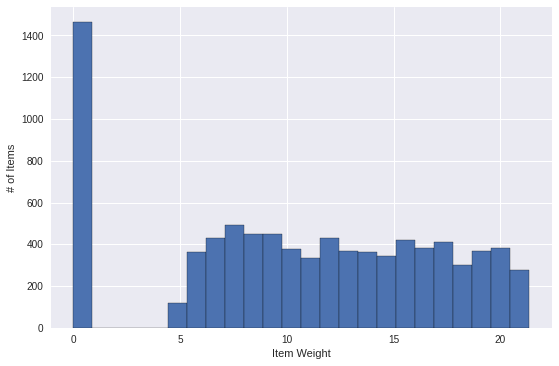

In [100]:
plt.style.use("seaborn")
plt.xlabel("Item Weight")
plt.ylabel('# of Items')
df_food['i_weight'].hist(bins = 'auto', edgecolor = 'black')
#An abundant amount of items barely weigh over 0. 

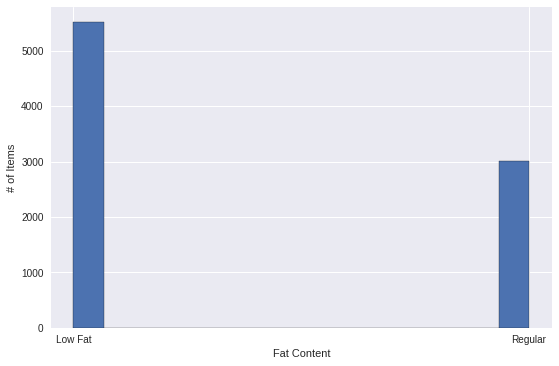

In [101]:
plt.style.use('seaborn')
plt.xlabel("Fat Content")
plt.ylabel('# of Items')
df_food["fat_content"].hist(bins = 'auto', edgecolor = 'black')

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: o_type, dtype: int64

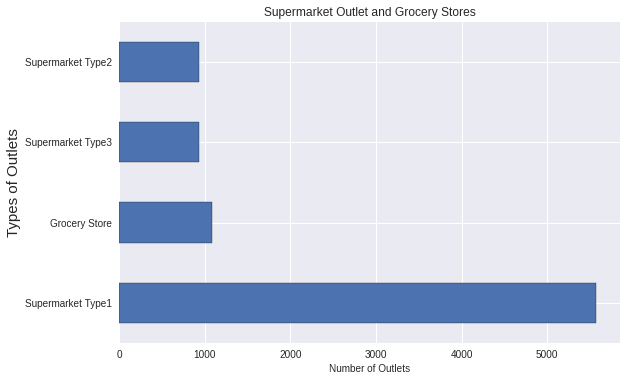

In [102]:
o_type_counts = df_food['o_type'].value_counts()
o_type_counts.plot(kind = "barh", edgecolor ='black')
plt.title("Supermarket Outlet and Grocery Stores")
plt.xlabel("Number of Outlets", fontsize = 10)
plt.ylabel('Types of Outlets', fontsize = 15)
o_type_counts

#Supermarket type 1 outweights the other 3 by almost double

In [103]:
df_food['max_retprice'].describe().round(2)

count    8523.00
mean      140.99
std        62.28
min        31.29
25%        93.83
50%       143.01
75%       185.64
max       266.89
Name: max_retprice, dtype: float64

First Quartile (Q1) =
Third Quartile (Q3) = 
Interquartile Range (IQR) = 
1.5 * IQR = 
'Minimum' (before outliers) 
'Maximum' (before outliers) 

Text(0, 0.5, 'Maximum')

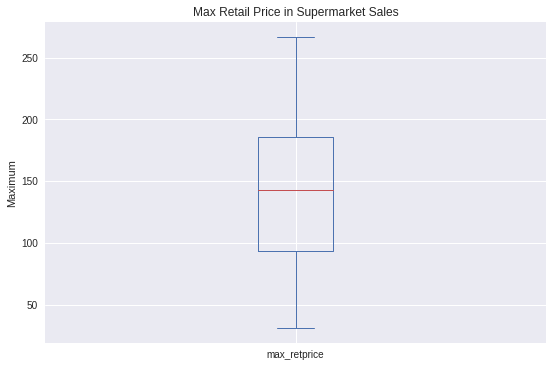

In [104]:
df_food['max_retprice'].plot(kind='box')
plt.title('Max Retail Price in Supermarket Sales')
plt.ylabel('Maximum')
#No outliers or anything of note here.

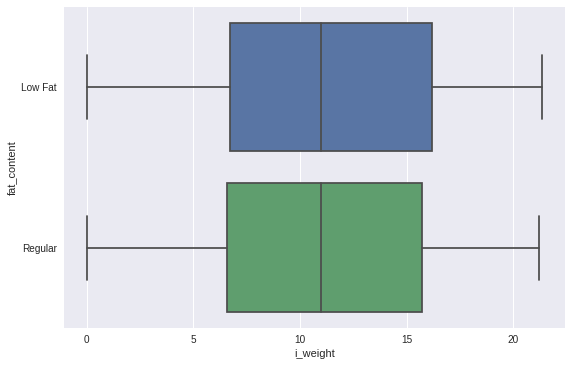

In [105]:
sns.boxplot(x='i_weight', y='fat_content', data=df_food)
#the Item weight and fat content do not affect eachother accordingly

In [106]:
corr = df_food.corr()

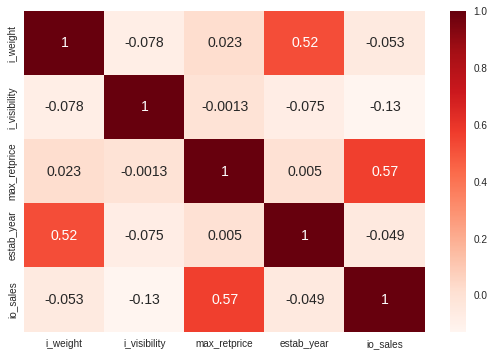

In [107]:
sns.heatmap(corr, cmap="Reds", annot = True)

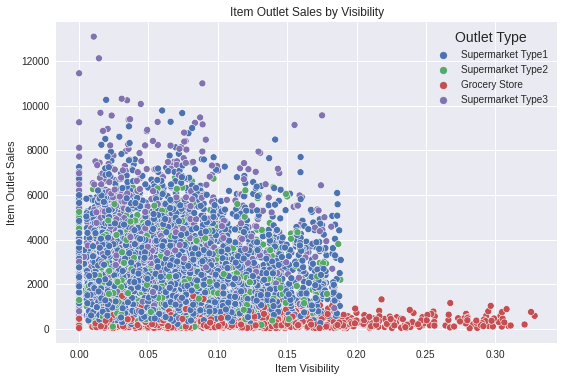

In [108]:
plt.style.use('seaborn')
sns.scatterplot(data=df_food, x='i_visibility', y= 'io_sales', hue='o_type')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title ("Item Outlet Sales by Visibility")
plt.legend(title ="Outlet Type")
#This Visualization shows a strong correlation in how grocery store sales are much lower than the other 3 combined regardless of an item's visibility. 



No handles with labels found to put in legend.


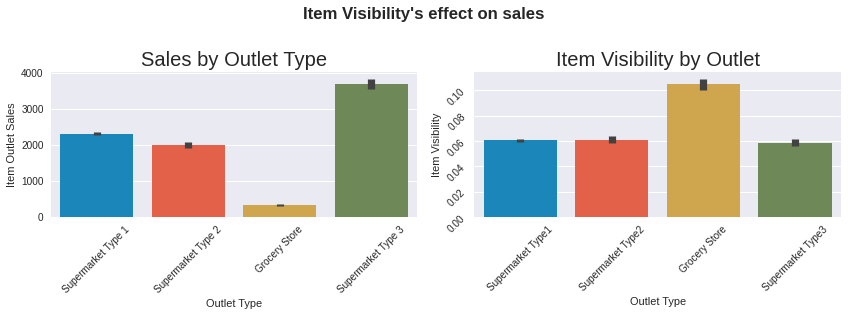

In [109]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
plt.style.use('fivethirtyeight')
labelso= ['Supermarket Type 1', 'Supermarket Type 2', 'Grocery Store', 'Supermarket Type 3']
sns.barplot(data=df_food, x='o_type', y='io_sales',ax=axes[0])
axes[0].set_title("Sales by Outlet Type")
axes[0].set_xlabel('Outlet Type')
axes[0].set_ylabel('Item Outlet Sales') 
axes[0].set_xticklabels(labels = labelso , rotation=45)
axes[0].legend()
sns.barplot(data = df_food, x="o_type", y='i_visibility', ax=axes[1])
axes[1].set_title("Item Visibility by Outlet")
axes[1].set_xlabel('Outlet Type')
axes[1].set_ylabel('Item Visibility')
plt.tick_params(rotation=45)

fig.suptitle("Item Visibility's effect on sales", Fontsize = 15, fontweight = "bold", y=1.10)
fig.tight_layout()
#these graphs show off in a more organized manner the sales they have and their item's visibility
#This gives us an easier time seeing the visibility has little to no correlation on its sales

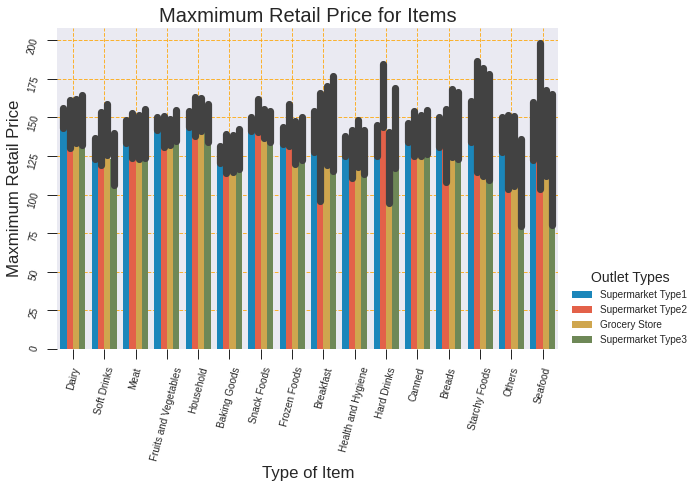

In [110]:
plt.style.use('seaborn-darkgrid')
sns.barplot(data=df_food, x='i_type', y='max_retprice', hue='o_type')
plt.tick_params(rotation = 75 ,size=10)
plt.xlabel('Type of Item')
plt.ylabel('Maxmimum Retail Price')
plt.title(label = 'Maxmimum Retail Price for Items')
plt.legend(loc=(1.02,0), title='Outlet Types')
plt.grid(c= 'orange', 
         alpha = .8,
         linestyle= '--')
#This barplot lists off the maximum retail price for items with bars for each Outlet type. 
#curiously, there are black hues, which i assume means some of the data for those is missing

In [122]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [112]:
y = df_food['io_sales']
X = df_food.drop(columns='io_sales')
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [113]:
catsel= make_column_selector(dtype_include = 'object')
numsel= make_column_selector(dtype_include= 'number')
numsel

In [114]:
numsel(Xtrain)

['i_weight', 'i_visibility', 'max_retprice', 'estab_year']

In [115]:
catsel(Xtrain)

['i_ident', 'fat_content', 'i_type', 'o_identify', 'o_loctype', 'o_type']

Iweight, visibility, Max Retail Price are Numerical

Ident, Fat Content, Item Type, Identifier, Location Type and Outlet type are Categorical

In [116]:
print(df_food.isna().sum().sum())

0


In [117]:
scalar= StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [119]:
numpipe = make_pipeline(meanimpute, scalar)
numpipe
catpipe= make_pipeline(freqimpute, ohe)

In [118]:
numtup = (numpipe, numsel)
cattup = (catpipe, catsel)
meanimpute= SimpleImputer(strategy='mean')
freqimpute= SimpleImputer(strategy='most_frequent')

In [120]:
preprocessor = make_column_transformer(numtup, cattup)

In [123]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9df8cdce10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9df8cdc7d0>)])

In [124]:
preprocessor.fit(Xtrain)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9df8cdce10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9df8cdc7d0>)])

In [126]:
Xtrapro=preprocessor.transform(Xtrain)
Xtespro=preprocessor.transform(Xtest)

In [129]:
print(np.isnan(Xtrapro).sum().sum(), 'missing values in training data')
print(np.isnan(Xtespro).sum().sum(), 'missing values in training data')
print('\n')
print('All data in Xtrain are', Xtrapro.dtype)
print('All data in Xtest are', Xtespro.dtype)
print('\n')
print('data shape', Xtrapro.shape)
print('\n')
Xtrapro

0 missing values in training data
0 missing values in training data


All data in Xtrain are float64
All data in Xtest are float64


data shape (6392, 1589)




array([[ 0.88049809, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.70999121, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26047307,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.07425591, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.50052311, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.88049809, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])